In [1]:
from Bio import SeqIO
import pandas as pd
import numpy as np
from tqdm import tqdm
import itertools
import pickle
import random

In [2]:
SPEC = "cotton"

In [3]:
raw_data = {}
with open(f"./{SPEC}_validate/{SPEC}.LTR.LTR.fasta", "r") as handle:
    for record in SeqIO.parse(handle, "fasta"):
        raw_data[record.id] = []
        
with open(f"./{SPEC}_validate/{SPEC}.LTR.LTR.fasta", "r") as handle:
    for record in SeqIO.parse(handle, "fasta"):
        raw_data[record.id] += str(record.seq)

data = {}
for k in raw_data.keys():
    data[k] = "".join(raw_data[k])

del raw_data

In [4]:
data.keys()

dict_keys(['ctg000000', 'ctg000010', 'ctg000020', 'ctg000030', 'ctg000040', 'ctg000050', 'ctg000060', 'ctg000070', 'ctg000080', 'ctg000090', 'ctg000100', 'ctg000110', 'ctg000120', 'ctg000130', 'ctg000140', 'ctg000150', 'ctg000170', 'ctg000180', 'ctg000190', 'ctg000200', 'ctg000210', 'ctg000220', 'ctg000230', 'ctg000240', 'ctg000250', 'ctg000260', 'ctg000270', 'ctg000280', 'ctg000290', 'ctg000300', 'ctg000310', 'ctg000320', 'ctg000330', 'ctg000340', 'ctg000350', 'ctg000360', 'ctg000370', 'ctg000380', 'ctg000390', 'ctg000400', 'ctg000410', 'ctg000430', 'ctg000440', 'ctg000450', 'ctg000460', 'ctg000470', 'ctg000480', 'ctg000490', 'ctg000500', 'ctg000510', 'ctg000520', 'ctg000530', 'ctg000540', 'ctg000550', 'ctg000560', 'ctg000570', 'ctg000580', 'ctg000590', 'ctg000600', 'ctg000620', 'ctg000630', 'ctg000640', 'ctg000650', 'ctg000660', 'ctg000670', 'ctg000680', 'ctg000690', 'ctg000700', 'ctg000710', 'ctg000720', 'ctg000730', 'ctg000740', 'ctg000750', 'ctg000760', 'ctg000770', 'ctg000780', '

In [5]:
def count_kmers(read, k):
    """Count kmer occurrences in a given read.

    Parameters
    ----------
    read : string
        A single DNA sequence.
    k : int
        The value of k for which to count kmers.

    Returns
    -------
    counts : dictionary, {'string': int}
        A dictionary of counts keyed by their individual kmers (strings
        of length k).

    Examples
    --------
    >>> count_kmers("GATGAT", 3)
    {'ATG': 1, 'GAT': 2, 'TGA': 1}
    """
    # Start with an empty dictionary
    counts = {}
    nucleotides = ['A', 'T', 'G', 'C']
    # Add the kmer to the dictionary if it's not there
    for i in itertools.product(nucleotides, repeat=k):
        counts["".join(i)] = 0
    # Calculate how many kmers of length k there are
    num_kmers = len(read) - k + 1
    # Loop over the kmer start positions
    for i in range(num_kmers):
        # Slice the string to get the kmer
        kmer = read[i:i+k]
        if kmer not in counts:
            continue
        # Increment the count for this kmer
        counts[kmer] += 1
    # Return the final counts
    return counts

In [6]:
K = 3
kmer_datas = {}

for k, v in tqdm(data.items()):
    kmer_data = count_kmers(v, K)
    kmer_datas[k] = kmer_data

100%|██████████| 181/181 [00:04<00:00, 39.81it/s]


In [7]:
import math
reg_data = {}
unmasked_data_length = {}
with open(f"./{SPEC}_validate/{SPEC}.fasta", "r") as f:
    for record in SeqIO.parse(f, "fasta"):
        unmasked_data_length[record.id] = len(record.seq)

for k1, v1 in kmer_datas.items():
    temp = {}
    for k2, v2 in v1.items():
        # temp[k2] = math.log(v2 / unmasked_data_length[k1] + 1)
        temp[k2] = v2 / unmasked_data_length[k1]
    reg_data[k1] = temp

In [8]:
#df = pd.DataFrame(kmer_datas)
df = pd.DataFrame(reg_data)

In [9]:
df.T

,AAA,AAT,AAG,AAC,ATA,ATT,ATG,ATC,AGA,AGT,...,CTG,CTC,CGA,CGT,CGG,CGC,CCA,CCT,CCG,CCC
ctg000000,0.000112,0.000112,0.000336,0.000308,0.000112,0.000112,0.000280,0.000112,0.000308,0.000336,...,0.000252,0.000196,0.000252,0.000308,0.000196,0.000168,0.000056,0.000336,0.000364,0.000140
ctg000010,0.001153,0.000529,0.000449,0.000609,0.000368,0.000096,0.000497,0.000368,0.000112,0.000096,...,0.000096,0.000497,0.000256,0.000096,0.000336,0.000048,0.000096,0.000721,0.000096,0.000769
ctg000020,0.000687,0.000656,0.000656,0.000952,0.000640,0.001218,0.000234,0.000609,0.000687,0.000500,...,0.000234,0.000796,0.000890,0.000437,0.000156,0.000578,0.000437,0.000640,0.000453,0.000718
ctg000030,0.000023,0.000023,0.000023,0.000000,0.000000,0.000000,0.000023,0.000023,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000023,0.000000,0.000000,0.000000
ctg000040,0.001271,0.000477,0.000445,0.000445,0.000334,0.000778,0.000604,0.000397,0.000683,0.000095,...,0.000302,0.001334,0.000349,0.000048,0.000651,0.000000,0.000000,0.000461,0.000016,0.000349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ctg001810,0.001014,0.000812,0.000647,0.000517,0.000632,0.000784,0.000535,0.000523,0.000674,0.000457,...,0.000348,0.000551,0.000328,0.000306,0.000284,0.000259,0.000471,0.000575,0.000275,0.000497
ctg001820,0.000986,0.000850,0.000728,0.000574,0.000673,0.000857,0.000556,0.000609,0.000737,0.000513,...,0.000404,0.000651,0.000396,0.000375,0.000334,0.000326,0.000539,0.000737,0.000341,0.000725
ctg001830,0.000967,0.000807,0.000619,0.000490,0.000609,0.000835,0.000524,0.000502,0.000663,0.000436,...,0.000350,0.000564,0.000315,0.000316,0.000279,0.000241,0.000434,0.000585,0.000274,0.000529
ctg001840,0.000970,0.000740,0.000481,0.000451,0.000530,0.000753,0.000428,0.000399,0.000474,0.000346,...,0.000272,0.000348,0.000190,0.000166,0.000151,0.000123,0.000354,0.000358,0.000152,0.000272


In [10]:
"""import seaborn as sns
import matplotlib.pyplot as plt
sns.clustermap(df.T, col_cluster=False, yticklabels=True, figsize=(50,50))
plt.savefig(f"./{SPEC}_clustermap.png")"""

'import seaborn as sns\nimport matplotlib.pyplot as plt\nsns.clustermap(df.T, col_cluster=False, yticklabels=True, figsize=(50,50))\nplt.savefig(f"./{SPEC}_clustermap.png")'

In [11]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

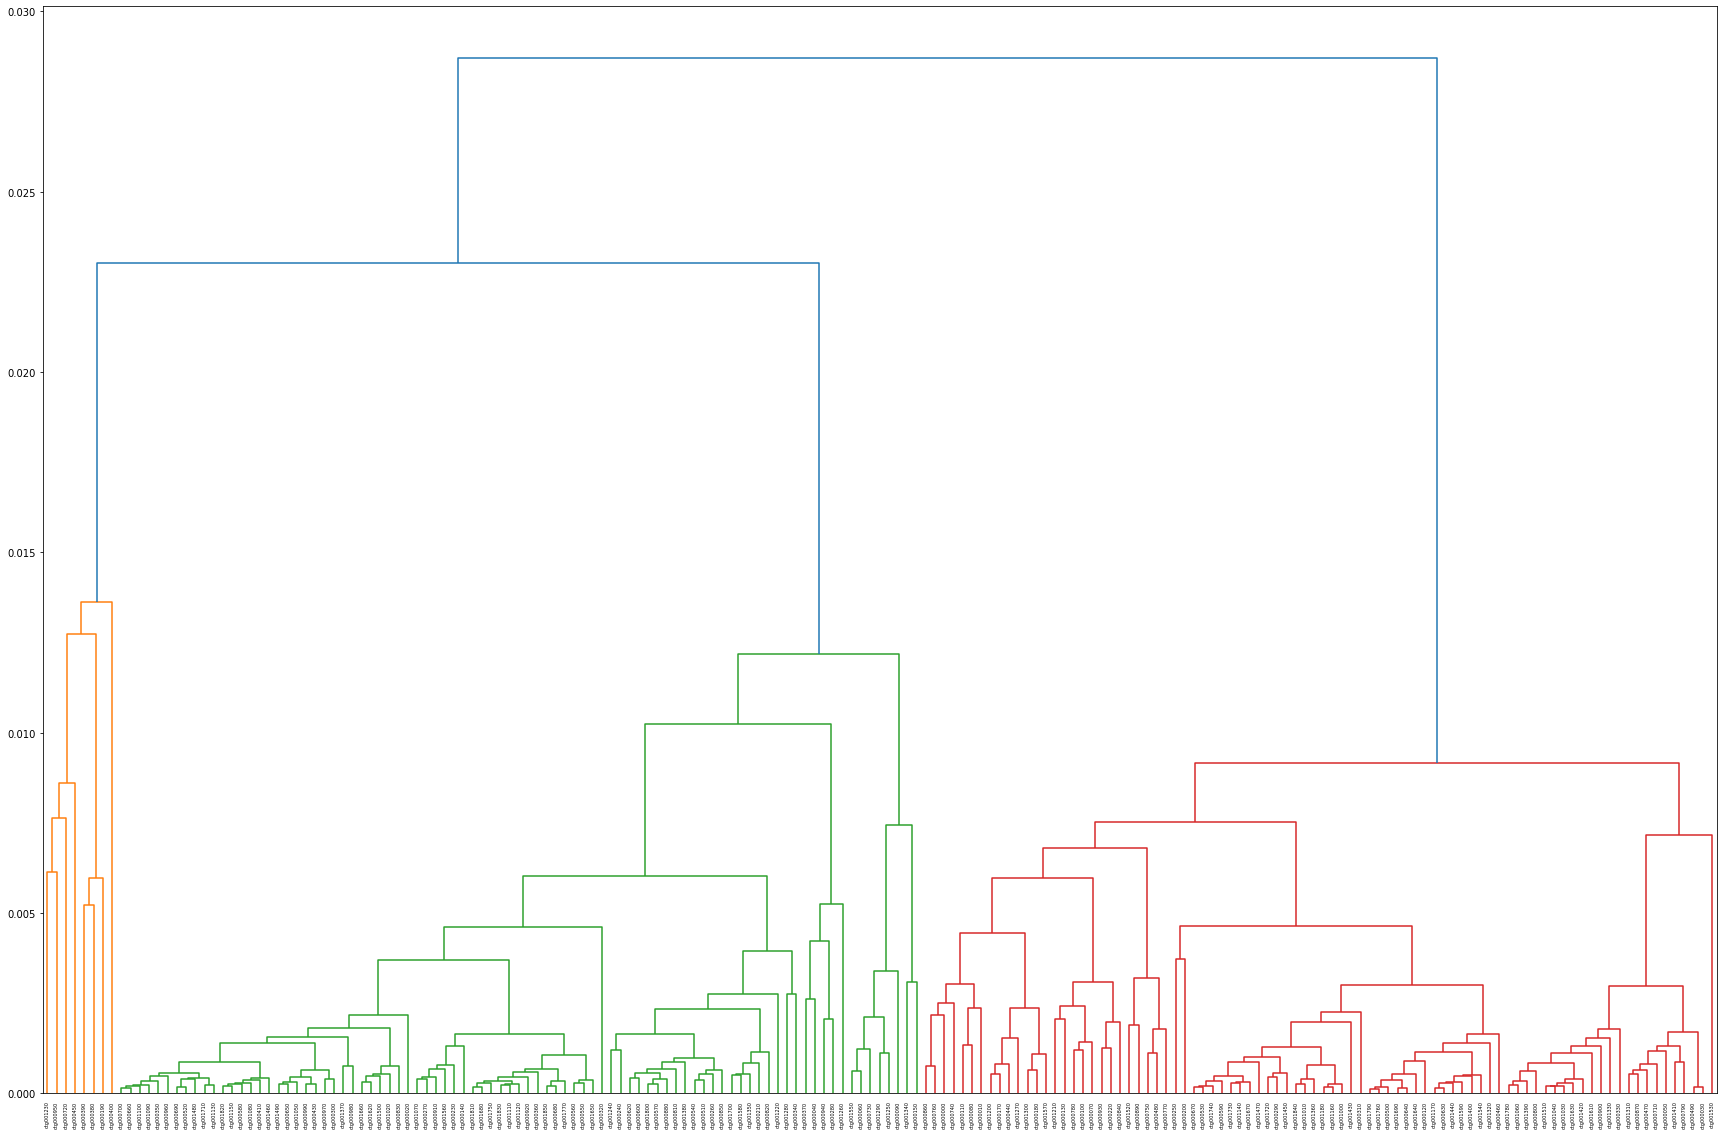

In [12]:
plt.figure(figsize=(30, 20))
linked = linkage(df.T, method="ward")
dend = dendrogram(linked, orientation='top', distance_sort='descending', \
                  labels=list(df.T.index), show_leaf_counts=True)
plt.savefig(f"./{SPEC}_dendrogram.png")

# For viola

In [13]:
cluster = {"C1":[], "C2": [], "C3":[], "C4":[]}
for l, c in zip(dend["leaves"], dend["leaves_color_list"]):
    cluster[c].append(l)

In [ ]:
sub1 = cluster["C2"]
sub2 = cluster["C1"] + cluster["C3"] + cluster["C4"]
def encoder(n):
    if n<10: return f"ctg0000{n}0"
    elif n<100: return f"ctg000{n}0"
    else: return f"ctg00{n}0"
sub1 = list(map(encoder, sub1))
sub2 = list(map(encoder, sub2))